**import packages**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

**ignore warning**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Read Dataset**

In [ ]:
df=pd.read_csv('/content/fraud.csv')
df

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.0,302.00,60.00,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.0,46066.00,38985.00,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.0,30355.00,14000.00,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Mar-13,C1683872391,754.0,2430.00,1676.00,"Greater Mumbai, India",TRANSFER,Gold,Entertainment,F,1
4,08-Apr-13,C1487780787,341580.0,449901.18,108321.18,"Chennai, India",TRANSFER,Silver,Entertainment,F,1
...,...,...,...,...,...,...,...,...,...,...,...
5494,09-Apr-13,C818509807,15848.0,33133.00,17285.00,"Lucknow, India",CASH_OUT,Signature,Food,M,0
5495,28-Aug-13,C1844585484,10309.0,49508.00,39199.00,"Delhi, India",CASH_OUT,Gold,Food,F,0
5496,29-Jun-12,C1682774387,44044.0,51608.00,7564.00,"Delhi, India",CASH_IN,Signature,Entertainment,M,0
5497,14-Oct-13,C370274052,24785.0,39250.00,14465.00,"Kanpur, India",CASH_OUT,Silver,Fuel,F,0


**Drop date**

In [ ]:
df.drop(['Date'],axis=1,inplace=True)

**Check null values**

In [ ]:
df.isna().sum()

,0
nameOrig,0
amount,13
oldbalanceOrg,0
newbalanceOrig,16
City,0
type,0
Card Type,0
Exp Type,0
Gender,0
isFraud,0


**Fill the missing values**

In [ ]:
cols=['amount','newbalanceOrig']
for col in cols:
  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

,0
nameOrig,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
City,0
type,0
Card Type,0
Exp Type,0
Gender,0
isFraud,0


**Check the datatypes**

In [ ]:
df.dtypes

,0
nameOrig,object
amount,float64
oldbalanceOrg,float64
newbalanceOrig,float64
City,object
type,object
Card Type,object
Exp Type,object
Gender,object
isFraud,int64


**Convert object to numeric using Label Encoder**

In [ ]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['Exp Type']=encoder.fit_transform(df['Exp Type'])
df['Card Type']=encoder.fit_transform(df['Card Type'])
df['type']=encoder.fit_transform(df['type'])
df['City']=encoder.fit_transform(df['City'])
df['nameOrig']=encoder.fit_transform(df['nameOrig'])

In [ ]:
df.dtypes

,0
nameOrig,int64
amount,float64
oldbalanceOrg,float64
newbalanceOrig,float64
City,int64
type,int64
Card Type,int64
Exp Type,int64
Gender,int64
isFraud,int64


**Split into Features & Target**

In [ ]:
X=df.iloc[:,:-1]
X

,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender
0,2861,242.0,302.00,60.00,5,2,1,2,0
1,5310,7081.0,46066.00,38985.00,92,2,1,1,1
2,5381,16355.0,30355.00,14000.00,194,2,4,3,0
3,1917,754.0,2430.00,1676.00,123,2,1,1,0
4,1391,341580.0,449901.18,108321.18,81,2,4,1,0
...,...,...,...,...,...,...,...,...,...
5494,4974,15848.0,33133.00,17285.00,218,1,3,2,1
5495,2380,10309.0,49508.00,39199.00,92,1,1,2,0
5496,1916,44044.0,51608.00,7564.00,92,0,3,1,1
5497,3673,24785.0,39250.00,14465.00,175,1,4,3,0


In [ ]:
y=df.iloc[:,-1]
y

,isFraud
0,1
1,1
2,1
3,1
4,1
...,...
5494,0
5495,0
5496,0
5497,0


**Data visualization**

**Heatmap**

<Axes: >

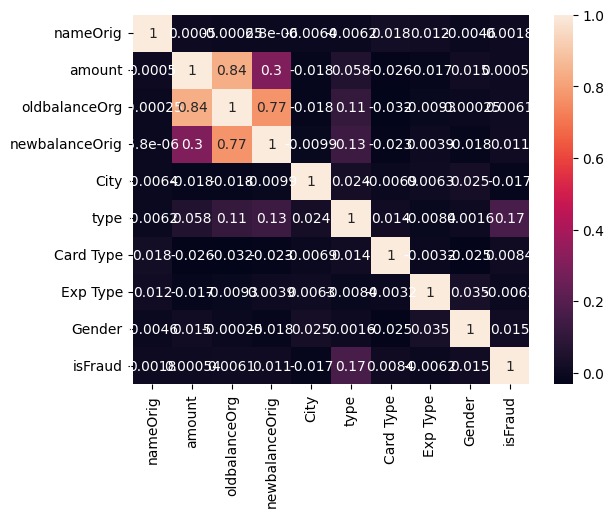

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# the color of white correlation shows positive correlation
# All the variables are 100% correlated with each other.

**Barplot**

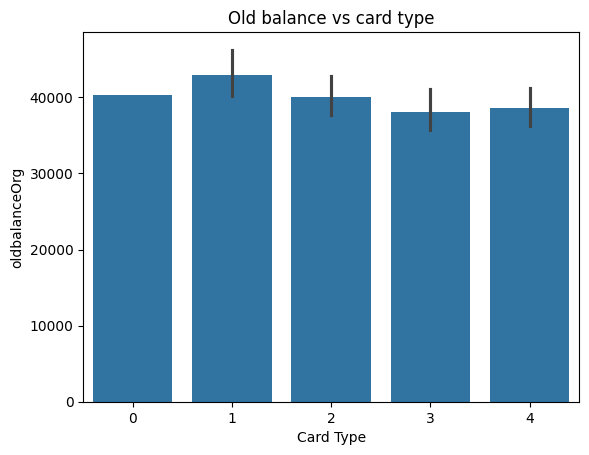

In [ ]:
sns.barplot(x='Card Type',y='oldbalanceOrg',data=df)
plt.title("Old balance vs card type")
plt.xlabel("Card Type")
plt.ylabel("oldbalanceOrg")
plt.show()

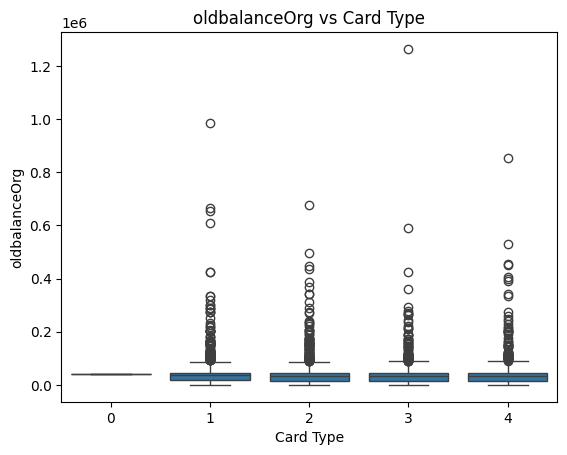

In [ ]:
sns.boxplot(x='Card Type',y='oldbalanceOrg',data=df)
plt.title("oldbalanceOrg vs Card Type")
plt.xlabel("Card Type")
plt.ylabel("oldbalanceOrg")
plt.show()

In [ ]:
# outliers exist in all values

**Scaling Features**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[5.20371044e-01, 2.11655081e-04, 2.36454184e-04, ...,
        2.50000000e-01, 3.33333333e-01, 0.00000000e+00],
       [9.65805748e-01, 6.21791691e-03, 3.64273883e-02, ...,
        2.50000000e-01, 1.66666667e-01, 1.00000000e+00],
       [9.78719534e-01, 1.43626855e-02, 2.40028676e-02, ...,
        1.00000000e+00, 5.00000000e-01, 0.00000000e+00],
       ...,
       [3.48490360e-01, 3.86801857e-02, 4.08100942e-02, ...,
        7.50000000e-01, 1.66666667e-01, 1.00000000e+00],
       [6.68061113e-01, 2.17662221e-02, 3.10371818e-02, ...,
        1.00000000e+00, 5.00000000e-01, 0.00000000e+00],
       [8.33939614e-01, 4.16372091e-03, 3.34586625e-02, ...,
        7.50000000e-01, 0.00000000e+00, 1.00000000e+00]])

**Split X&y for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**Model creation and test performance**

************** KNeighborsClassifier(n_neighbors=13) **************
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1441
           1       0.38      0.05      0.09       209

    accuracy                           0.87      1650
   macro avg       0.63      0.52      0.51      1650
weighted avg       0.82      0.87      0.82      1650


************** SVC() **************
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1441
           1       0.00      0.00      0.00       209

    accuracy                           0.87      1650
   macro avg       0.44      0.50      0.47      1650
weighted avg       0.76      0.87      0.81      1650


************** MultinomialNB() **************
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1441
           1       0.00      0.00      0.00       209

    accuracy                   

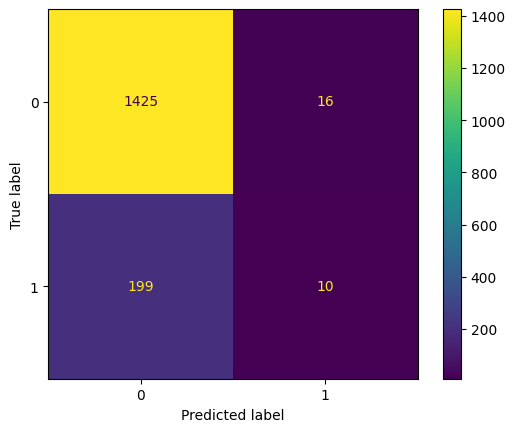

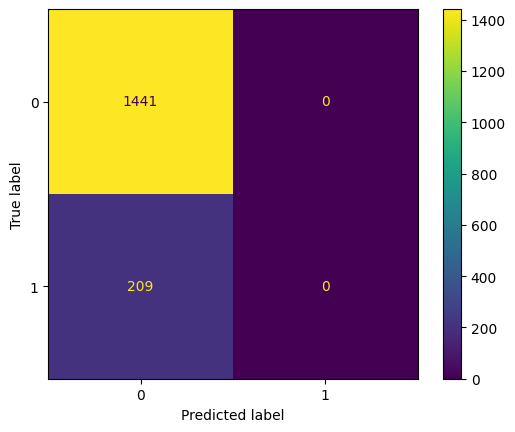

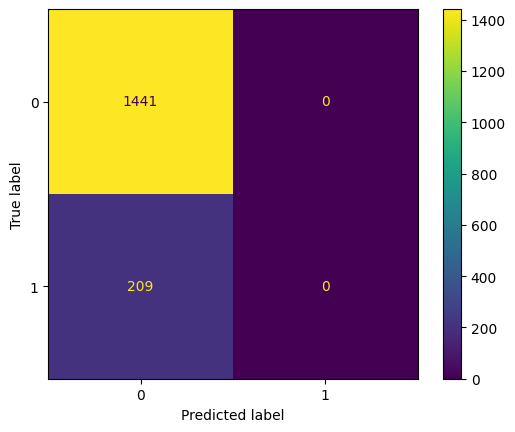

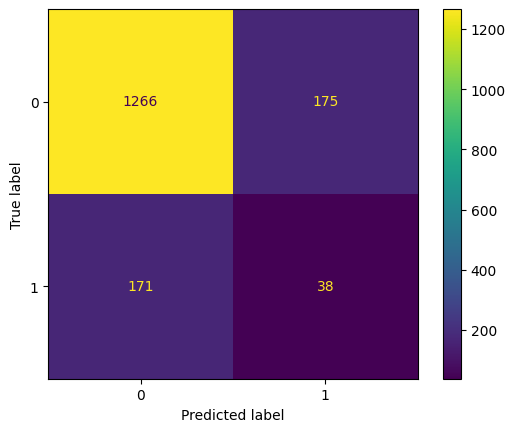

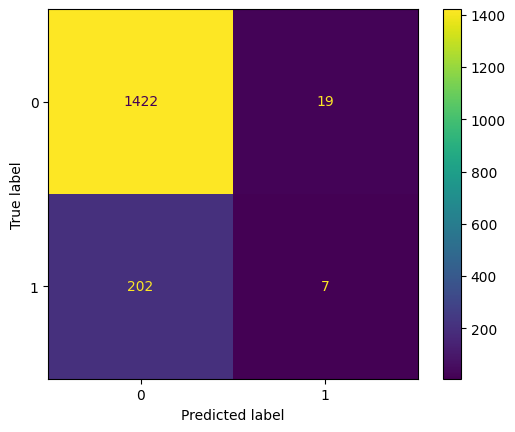

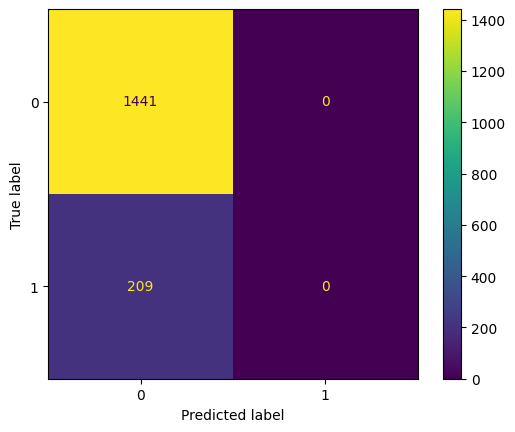

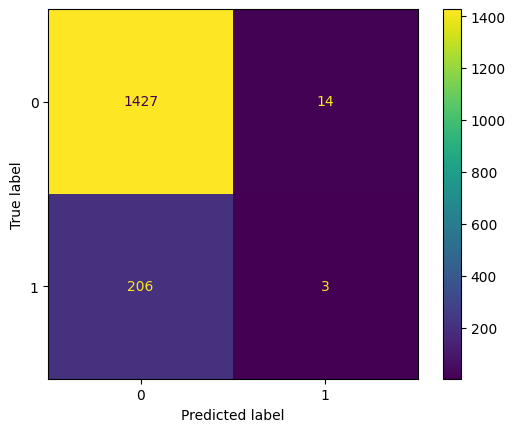

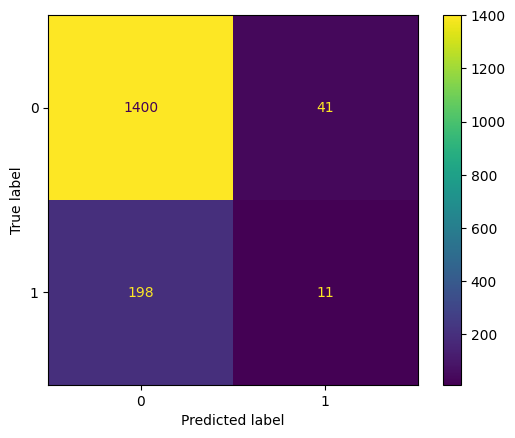

In [ ]:
knn=KNeighborsClassifier(n_neighbors=13)
sv=SVC(kernel='rbf')
nb=MultinomialNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf=RandomForestClassifier(criterion='entropy',random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xgb=XGBClassifier(random_state=1)
models=[knn,sv,nb,dt,rf,ab,gb,xgb]
for model in models:
  print("**************",model,"**************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()

**Oversampling**

In [ ]:
y.value_counts()

,count
isFraud,
0,4794
1,705


In [ ]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X_scaled,y)

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

************** KNeighborsClassifier(n_neighbors=13) **************
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1458
           1       0.67      0.86      0.75      1419

    accuracy                           0.72      2877
   macro avg       0.74      0.72      0.72      2877
weighted avg       0.74      0.72      0.72      2877


************** SVC() **************
              precision    recall  f1-score   support

           0       0.58      0.90      0.70      1458
           1       0.76      0.33      0.46      1419

    accuracy                           0.62      2877
   macro avg       0.67      0.61      0.58      2877
weighted avg       0.67      0.62      0.59      2877


************** MultinomialNB() **************
              precision    recall  f1-score   support

           0       0.60      0.48      0.54      1458
           1       0.56      0.67      0.61      1419

    accuracy                   

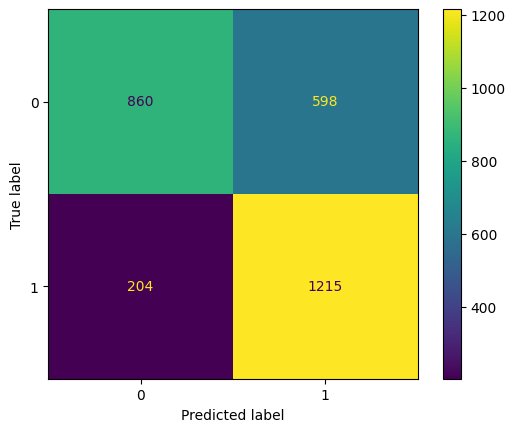

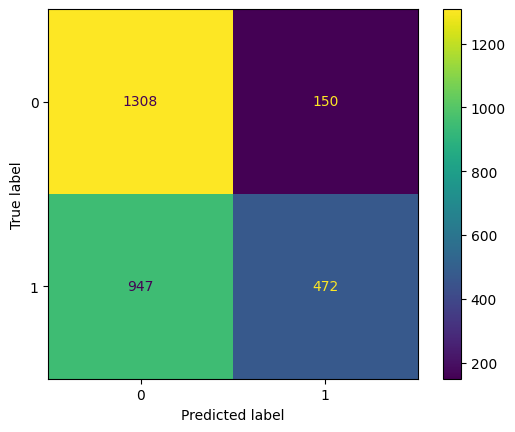

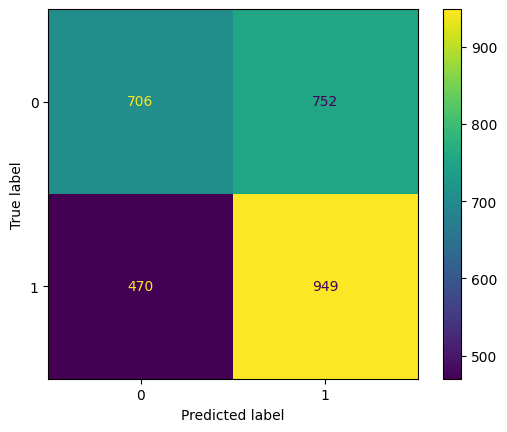

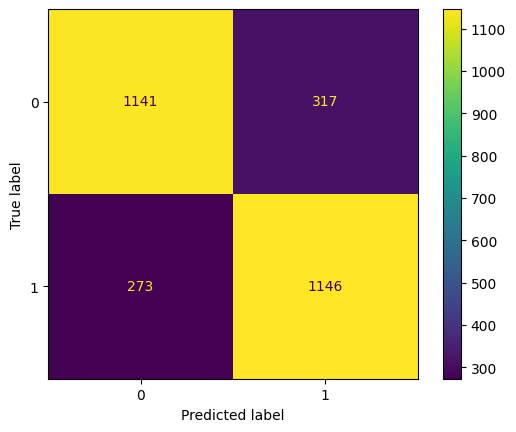

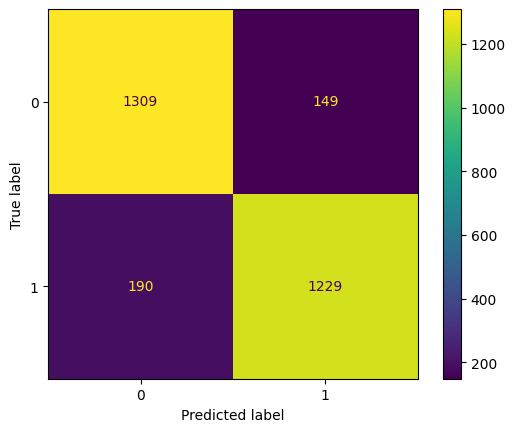

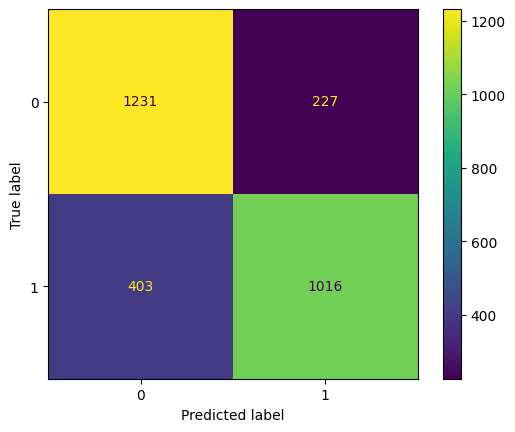

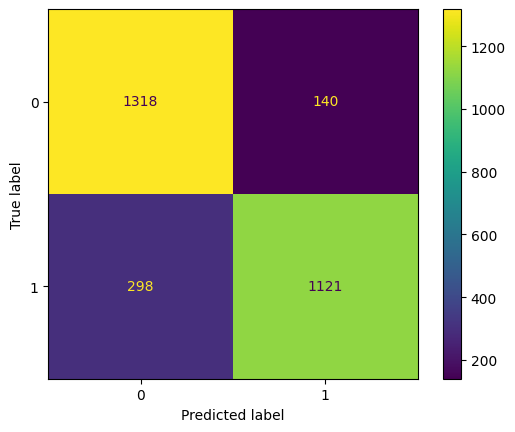

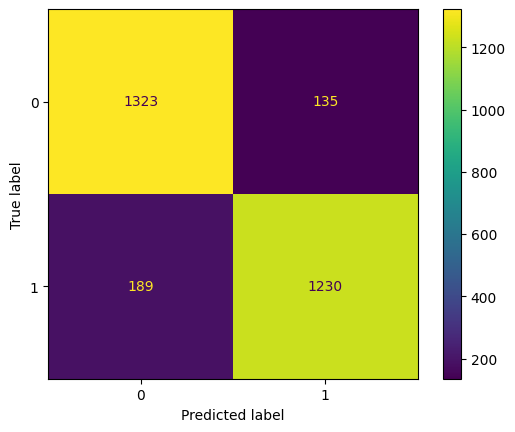

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=13)
sv1=SVC(kernel='rbf')
nb1=MultinomialNB()
dt1=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf1=RandomForestClassifier(criterion='entropy',random_state=1)
ab1=AdaBoostClassifier(random_state=1)
gb1=GradientBoostingClassifier(random_state=1)
xgb1=XGBClassifier(random_state=1)
models=[knn1,sv1,nb1,dt1,rf1,ab1,gb1,xgb1]
for model in models:
  print("**************",model,"**************")
  model.fit(X_os_train,y_os_train)
  y_os_pred=model.predict(X_os_test)
  print(classification_report(y_os_test,y_os_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred))
  print()

**ROC curve**

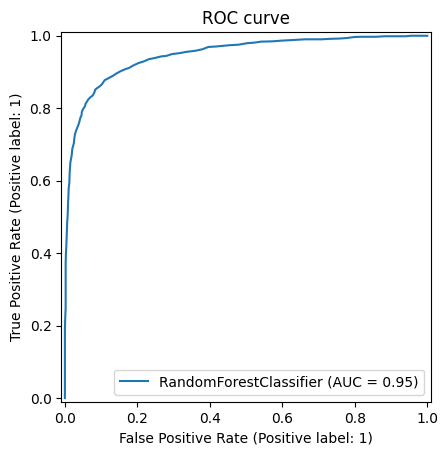

In [ ]:
RocCurveDisplay.from_estimator(rf1,X_os_test,y_os_test)
plt.title('ROC curve')
plt.show()

**Hyperparameter tuning**

In [ ]:
params_rf={'criterion':['gini','entropy','log_loss'],
           'n_estimators':[100,120,130]}

In [ ]:
clf=GridSearchCV(rf1,params_rf,cv=10,scoring='accuracy')
clf.fit(X_os_train,y_os_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 120, 130]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 120}

In [ ]:
y_pred=clf.predict(X_os_test)
print(classification_report(y_os_test,y_os_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1458
           1       0.90      0.87      0.88      1419

    accuracy                           0.89      2877
   macro avg       0.89      0.89      0.89      2877
weighted avg       0.89      0.89      0.89      2877



**Features selection**

In [ ]:
df.corr()

,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
nameOrig,1.000000,0.000501,-0.000252,0.000007,-0.006366,-0.006210,0.018456,0.012465,-0.004601,0.001813
amount,0.000501,1.000000,0.837896,0.299871,-0.018391,0.057721,-0.026443,-0.016869,0.015282,0.000543
oldbalanceOrg,-0.000252,0.837896,1.000000,0.770927,-0.018001,0.113011,-0.032104,-0.009333,-0.000254,0.006141
newbalanceOrig,0.000007,0.299871,0.770927,1.000000,-0.009876,0.129792,-0.023250,0.003898,-0.017551,0.011439
City,-0.006366,-0.018391,-0.018001,-0.009876,1.000000,0.024360,-0.006853,0.006300,0.024548,-0.016773
type,-0.006210,0.057721,0.113011,0.129792,0.024360,1.000000,0.013917,-0.008394,0.001624,0.169107
Card Type,0.018456,-0.026443,-0.032104,-0.023250,-0.006853,0.013917,1.000000,-0.003183,-0.024625,0.008390
Exp Type,0.012465,-0.016869,-0.009333,0.003898,0.006300,-0.008394,-0.003183,1.000000,0.034892,-0.006164
Gender,-0.004601,0.015282,-0.000254,-0.017551,0.024548,0.001624,-0.024625,0.034892,1.000000,0.015030
isFraud,0.001813,0.000543,0.006141,0.011439,-0.016773,0.169107,0.008390,-0.006164,0.015030,1.000000


In [ ]:
X=X.drop(['amount','type','City'],axis=1)

In [ ]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[5.20371044e-01, 2.36454184e-04, 1.05140566e-04, 2.50000000e-01,
        3.33333333e-01, 0.00000000e+00],
       [9.65805748e-01, 3.64273883e-02, 6.83150827e-02, 2.50000000e-01,
        1.66666667e-01, 1.00000000e+00],
       [9.78719534e-01, 2.40028676e-02, 2.45327987e-02, 1.00000000e+00,
        5.00000000e-01, 0.00000000e+00],
       ...,
       [3.48490360e-01, 4.08100942e-02, 1.32547207e-02, 7.50000000e-01,
        1.66666667e-01, 1.00000000e+00],
       [6.68061113e-01, 3.10371818e-02, 2.53476381e-02, 1.00000000e+00,
        5.00000000e-01, 0.00000000e+00],
       [8.33939614e-01, 3.34586625e-02, 6.58355176e-02, 7.50000000e-01,
        0.00000000e+00, 1.00000000e+00]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

***** KNeighborsClassifier(n_neighbors=13) *****
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1441
           1       0.00      0.00      0.00       209

    accuracy                           0.87      1650
   macro avg       0.44      0.50      0.47      1650
weighted avg       0.76      0.87      0.81      1650


***** SVC() *****
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1441
           1       0.00      0.00      0.00       209

    accuracy                           0.87      1650
   macro avg       0.44      0.50      0.47      1650
weighted avg       0.76      0.87      0.81      1650


***** MultinomialNB() *****
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1441
           1       0.00      0.00      0.00       209

    accuracy                           0.87      1650
   macro avg       0.44      0.

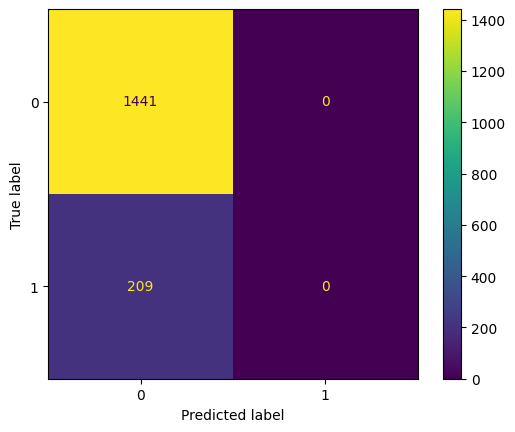

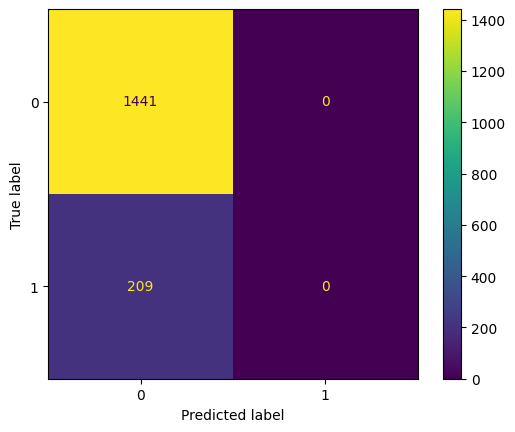

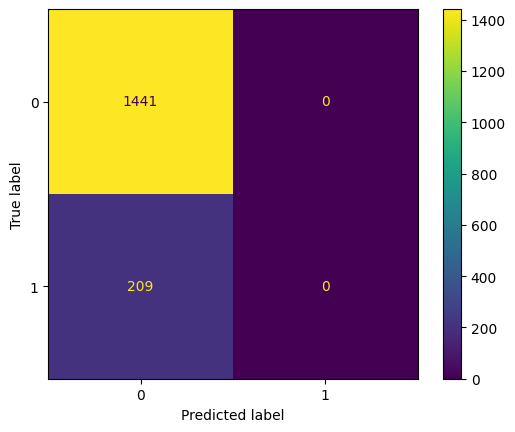

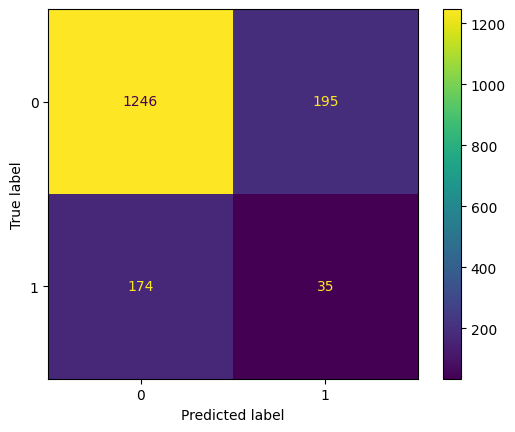

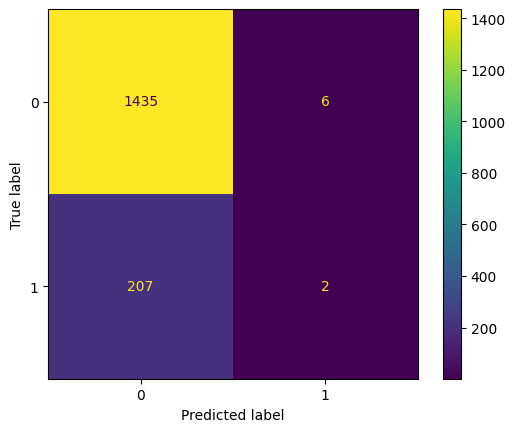

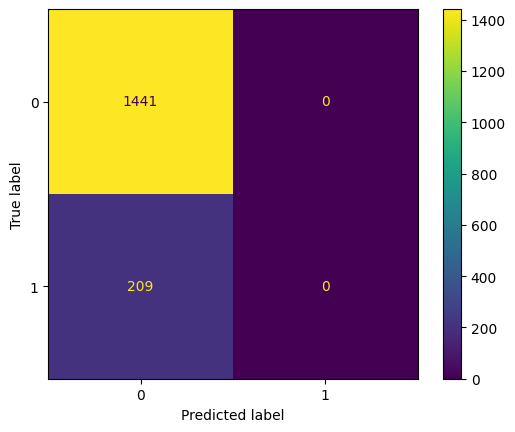

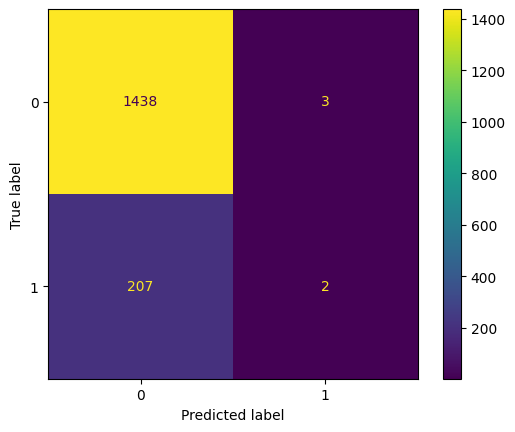

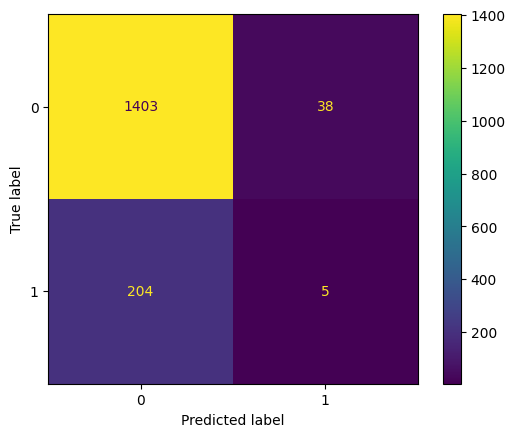

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=13)
sv2=SVC(kernel='rbf')
nb2=MultinomialNB()
dt2=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf2=RandomForestClassifier(criterion='entropy',random_state=1)
ab2=AdaBoostClassifier()
gb2=GradientBoostingClassifier()
xgb2=XGBClassifier()
models=[knn2,sv2,nb2,dt2,rf2,ab2,gb2,xgb2]
for model in models:
  print("*****",model,"*****")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()

**dump the best model**

**oversampled randomforest model has high accuracy of** **88**

In [ ]:
X=df.iloc[:,:-1]
X

,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender
0,2861,242.0,302.00,60.00,5,2,1,2,0
1,5310,7081.0,46066.00,38985.00,92,2,1,1,1
2,5381,16355.0,30355.00,14000.00,194,2,4,3,0
3,1917,754.0,2430.00,1676.00,123,2,1,1,0
4,1391,341580.0,449901.18,108321.18,81,2,4,1,0
...,...,...,...,...,...,...,...,...,...
5494,4974,15848.0,33133.00,17285.00,218,1,3,2,1
5495,2380,10309.0,49508.00,39199.00,92,1,1,2,0
5496,1916,44044.0,51608.00,7564.00,92,0,3,1,1
5497,3673,24785.0,39250.00,14465.00,175,1,4,3,0


In [ ]:
scaler1=MinMaxScaler()
X_scaled=scaler1.fit_transform(X)
X_scaled

array([[5.20371044e-01, 2.11655081e-04, 2.36454184e-04, ...,
        2.50000000e-01, 3.33333333e-01, 0.00000000e+00],
       [9.65805748e-01, 6.21791691e-03, 3.64273883e-02, ...,
        2.50000000e-01, 1.66666667e-01, 1.00000000e+00],
       [9.78719534e-01, 1.43626855e-02, 2.40028676e-02, ...,
        1.00000000e+00, 5.00000000e-01, 0.00000000e+00],
       ...,
       [3.48490360e-01, 3.86801857e-02, 4.08100942e-02, ...,
        7.50000000e-01, 1.66666667e-01, 1.00000000e+00],
       [6.68061113e-01, 2.17662221e-02, 3.10371818e-02, ...,
        1.00000000e+00, 5.00000000e-01, 0.00000000e+00],
       [8.33939614e-01, 4.16372091e-03, 3.34586625e-02, ...,
        7.50000000e-01, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
import pickle
pickle.dump(rf1,open('rfmodel.sav','wb'))

In [ ]:
pickle.dump(scaler1,open('scaler1.sav','wb'))

In [ ]:
y_new=rf1.predict(scaler1.transform([[4585,4742.0,42312.00,37570.00,194,1,3,0,1]]))
y_new.item()

0